<a href="https://colab.research.google.com/github/cyberkutti-iedc/MLMGooglecolab/blob/main/House_Price_Prediction_using_an_MLP_(Multilayer_Perceptron).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Install necessary packages (optional if already installed)
!pip install -q scikit-learn matplotlib tensorflow

In [2]:
# 2. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# 3. Generate Synthetic Dataset (10 features)
X, y = make_regression(n_samples=1000, n_features=10, noise=15.0, random_state=42)
y = y.reshape(-1, 1)  # Make y 2D for compatibility

In [4]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# 5. Normalize Features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [6]:
# 6. Build MLP Model
model = Sequential([
    Dense(64, input_dim=10, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear output for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 7. Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')



In [8]:
# 8. Train Model
history = model.fit(X_train_scaled, y_train_scaled,
                    epochs=100, batch_size=32,
                    validation_split=0.1, verbose=0)


In [9]:
# 9. Evaluate Model
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse_mlp = mean_squared_error(y_test, y_pred)
print(f"🔹 MLP Model MSE: ${mse_mlp:,.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
🔹 MLP Model MSE: $361.40


In [10]:
# 10. Compare with Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_lr_pred_scaled = lr.predict(X_test_scaled)
y_lr_pred = scaler_y.inverse_transform(y_lr_pred_scaled)

mse_lr = mean_squared_error(y_test, y_lr_pred)
print(f"🔸 Linear Regression MSE: ${mse_lr:,.2f}")

improvement = 100 * (mse_lr - mse_mlp) / mse_lr
print(f"✅ Improvement using MLP: {improvement:.2f}%")


🔸 Linear Regression MSE: $214.02
✅ Improvement using MLP: -68.86%


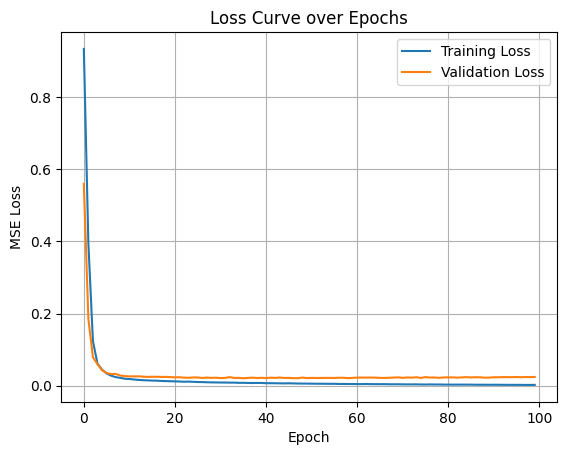

In [11]:

# 11. Plot Loss Curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()